In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

# Домашнее задание к лекции "Визуализация данных"
### Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

- построить не менее 4 визуализаций различных видов;  
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;  
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).  

Откуда брать данные?  

В качестве исследуемых данных я набор данных, состоящий из телешоу и фильмов, доступных на Netflix по состоянию на 2019 год. Набор данных собирается из Flixable, которая является сторонней поисковой системой Netflix.

In [3]:
netflix = pd.read_csv('/Users/sergejvasiljev/Documents/DATASETS/netflix_titles.csv')

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
show_id         7787 non-null object
type            7787 non-null object
title           7787 non-null object
director        5398 non-null object
cast            7069 non-null object
country         7280 non-null object
date_added      7777 non-null object
release_year    7787 non-null int64
rating          7780 non-null object
duration        7787 non-null object
listed_in       7787 non-null object
description     7787 non-null object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
netflix.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

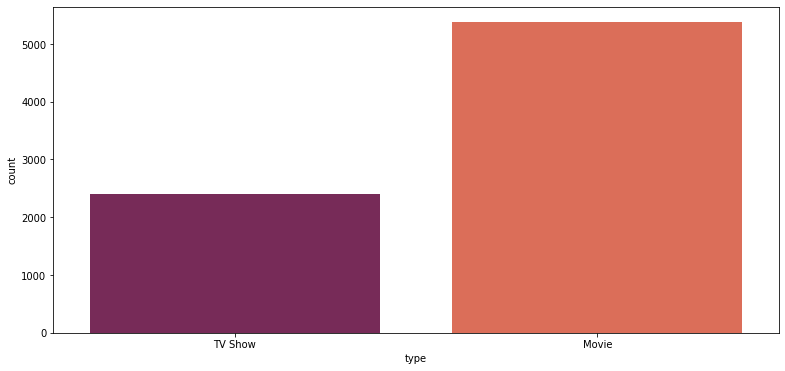

In [8]:
ax = sns.countplot(x="type", data=netflix, palette="rocket")
ax

Как видно из графиов, на видеосервисе фильмов представленно гораздо больше, чем ТВ шоу. 

### Посмотрим как менялось кол-во фильмов и шоу с течением времени. 

<AxesSubplot:xlabel='release_year'>

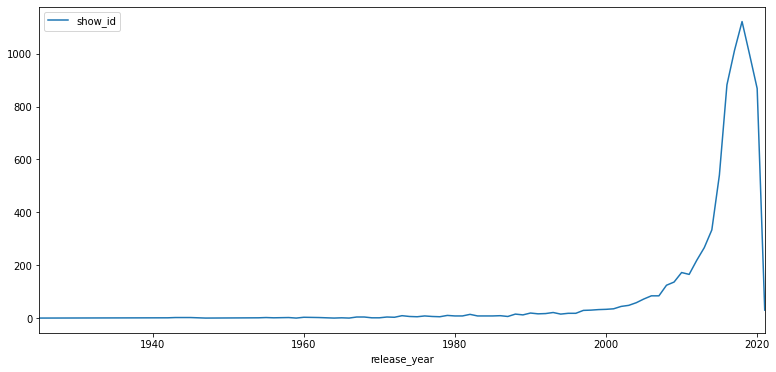

In [9]:
netflix[['show_id', 'release_year']].groupby('release_year').count().plot()

До 2000 года изменения не значительные, по этому отбросим хвост и взглянем на период с 2000 по 2021 более подробно. 

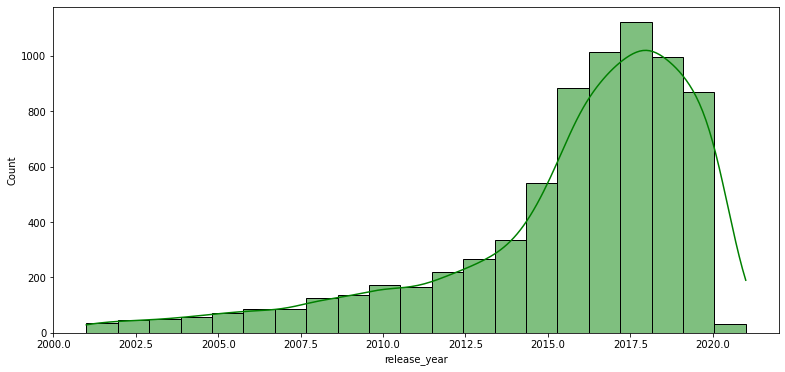

In [10]:
year_over_2000 = netflix[netflix['release_year']>2000]
df = year_over_2000[['show_id', 'release_year']]
ax = sns.histplot(data=year_over_2000, x='release_year', color='green', kde=True, bins=21)

По графику видно, что 2018 год является самым богатым на релизы фильмов и тв шоу. Это можно связать с наростающей популярностью Netflix среди зрителей и небольшим кол-вом конкурентов на тот момент. Затем начианют набирать силу конкуренты, по этому ставку делают на качество, а не на количество. Данные за 2021 год скорее всего не полные и актуальны только на момент выгрузки дата фрейма. 

### ТВ шоу и фильмы отдельно

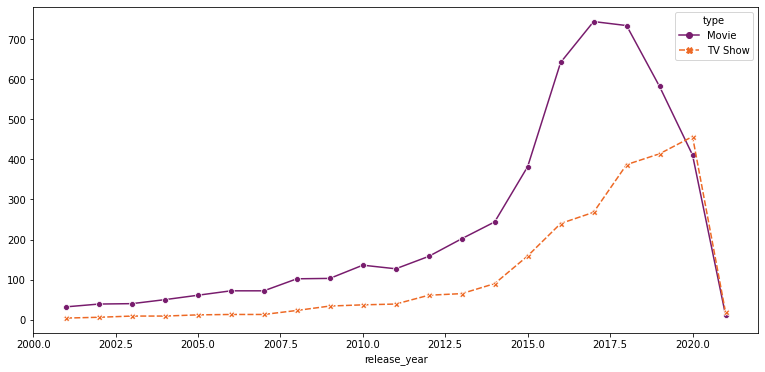

In [11]:
df = pd.pivot_table(year_over_2000, values='show_id', index=['release_year'], columns=['type'], aggfunc='count', fill_value=0)
ax = sns.lineplot(data = df, markers=True, palette = 'inferno')

Как и ожидалось, кол-во вильмов на много превышает кол-во ТВ-шоу. 

### Давайте узнаем топ-10 стран, которые производят больше всего контента 

In [12]:
countries={}
netflix['country']=netflix['country'].fillna('Unknown')
cou=list(netflix['country'])
for i in cou:
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [13]:
countries_top = {k: v for k, v in sorted(countries.items(),key=lambda item: item[1], reverse= True)}


[Text(0, 0, ' United States'),
 Text(1, 0, ' France'),
 Text(2, 0, ' Canada'),
 Text(3, 0, ' United Kingdom'),
 Text(4, 0, ' Germany'),
 Text(5, 0, ' Belgium'),
 Text(6, 0, ' China'),
 Text(7, 0, ' Japan'),
 Text(8, 0, ' Spain'),
 Text(9, 0, ' Australia')]

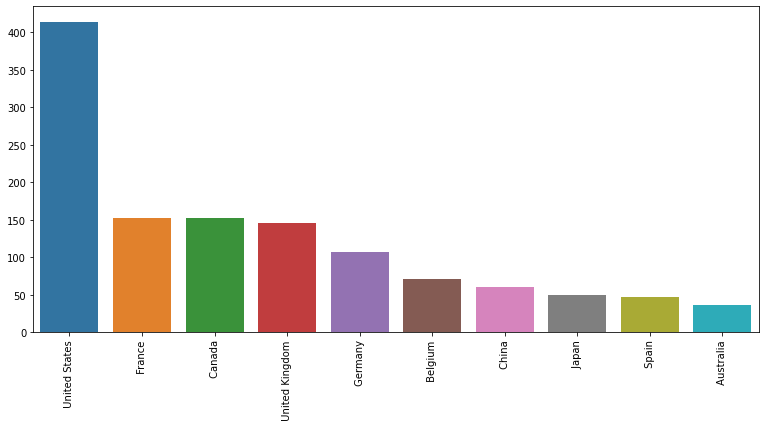

In [14]:
ax = sns.barplot(x=list(countries_top.keys())[0:10],y=list(countries_top.values())[0:10])
ax.set_xticklabels(list(countries_top.keys())[0:10],rotation = 90)

Как не удивительно, США в разы обгоняют другие страны по производству контента. 

### Давайте посмотрим как менялась продолжительность фильмов с течением времени

In [15]:
df_films = year_over_2000[year_over_2000['type']=='Movie']

In [16]:
df_films['duration']=df_films['duration'].str.replace(' min','')
df_films['duration']=df_films['duration'].astype(str).astype(int)

<ipython-input-16-4b0793b0b1f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_films['duration']=df_films['duration'].str.replace(' min','')
<ipython-input-16-4b0793b0b1f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_films['duration']=df_films['duration'].astype(str).astype(int)


Text(0.5, 1.0, 'duration')

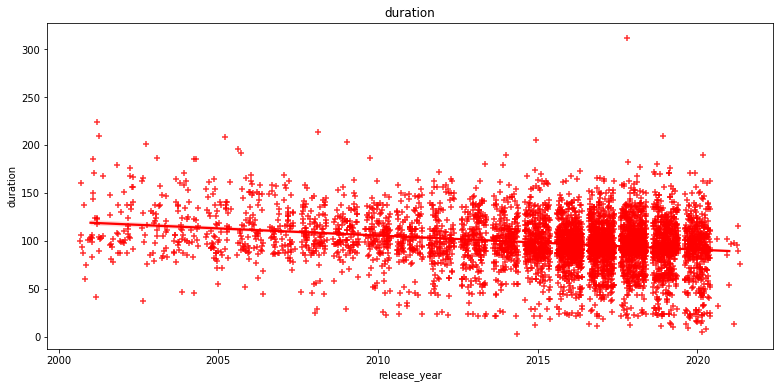

In [17]:
ax = sns.regplot(data=df_films, x='release_year', y='duration', color='r', marker='+',\
x_jitter=0.4)
ax.set_title('duration')

Как мы видим, с течением времени средняя продолжительность фильмов стремится к 100 минутам, но так же присутвуют наблюдения больше 150 минут. Так же в 2020 году вышло много короткометражек (доо 50 мин).  
### Давайте посмотрим на эти значения более подробно
Воспользуемся для этого графиками box-plot

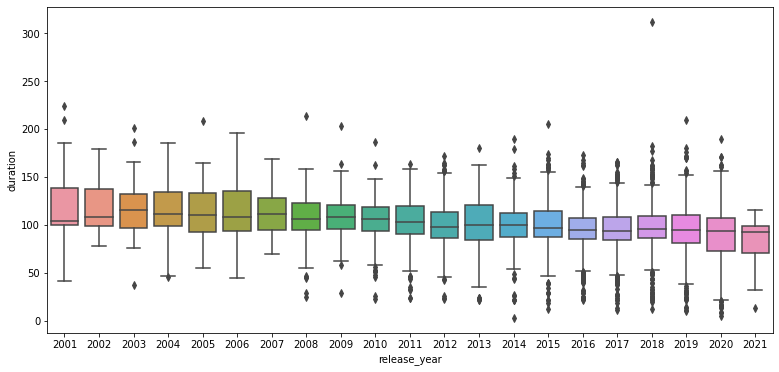

In [18]:
ax = sns.boxplot(x="release_year", y="duration", data=df_films)


После 2013 года наблюдается большое кол-во выбросов  
2014, 2016, 2019 достаточно симметричны и не видно явных перекосов